#### Notebook config

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

INFO:numexpr.utils._init_num_threads: NumExpr defaulting to 4 threads.
/home/kajetan/software/Kolumbo-FWI/fwipy/__init__.py


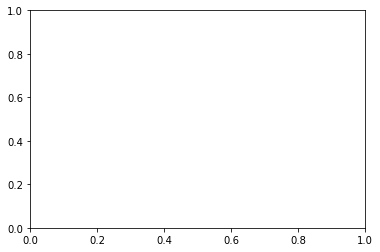

In [3]:
import fwipy 
print(fwipy.__file__)
from fwipy import *
from fwipy.config.logging import *
lll(40)
from fwipy.ioapi.segy import SgyFile
plt.style.reload_library()
plt.style.use(['default', 'paper2022kolumbo'])
tracf = 4105
ep = 8

# Read 

In [69]:
data_path = '../data/'
sgyobs = SgyFile('data_kolumbo_PhD_all_traces_field_fltrd.sgy', data_path)
sgy000 = SgyFile('data_kolumbo_PhD_all_traces_synth_it000.sgy', data_path)
sgylvz = SgyFile('method_s01_800_50-Synthetic.sgy', data_path)
# sgy020 = SgyFile('data_kolumbo_PhD_all_traces_synth_it020.sgy', data_path)
# sgy080 = SgyFile('data_kolumbo_PhD_all_traces_synth_it080.sgy', data_path)
sgy160 = SgyFile('data_kolumbo_PhD_all_traces_synth_it160.sgy', data_path)

In [5]:
data_path = '../data/'
sgyobsm = SgyFile('data_kolumbo_PhD_all_traces_field_fltrd_muted.sgy', data_path)
sgy000m = SgyFile('data_kolumbo_PhD_all_traces_synth_it000_muted.sgy', data_path)
# sgy020m = SgyFile('data_kolumbo_PhD_all_traces_synth_it020_muted.sgy', data_path)
# sgy080m = SgyFile('data_kolumbo_PhD_all_traces_synth_it080_muted.sgy', data_path)
sgy160m = SgyFile('data_kolumbo_PhD_all_traces_synth_it160_muted.sgy', data_path)
sgylvzm = SgyFile('method_s01_800_50-Synthetic_muted.sgy', data_path)

In [35]:
from fwipy.utils import *
kws = dict(label='obs', color='r', ow=0, norm='max', amplify=300)

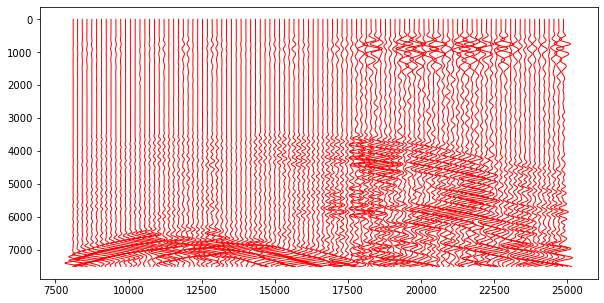

In [36]:
fig = plt.figure(figsize=(10,5))
ax = plot_data_wigg(sgyobs, tracf, ep, **kws)
ax.invert_yaxis()

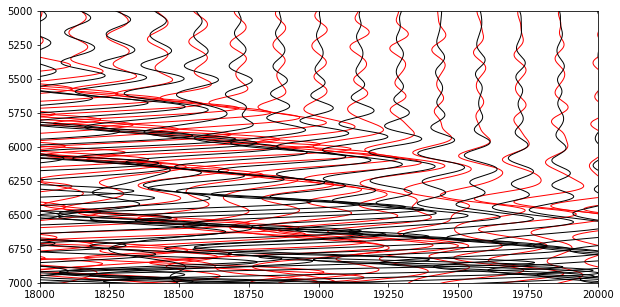

In [70]:
fig = plt.figure(figsize=(10,5))
tracf, ep = 4125, 30
kws = dict(label='obs', color='r', ow=0, norm=None, amplify=10)
ax = plot_data_wigg(sgy000, tracf, ep, **kws)
ax = plot_data_wigg(sgy160, tracf, ep, **dict(kws, color='k'))

plt.xlim(18000, 20000)
plt.ylim(5000,7000)
ax.invert_yaxis()

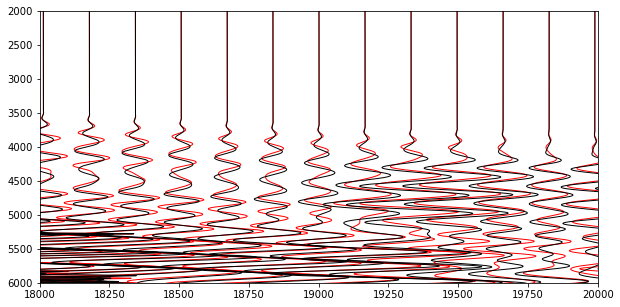

In [57]:
fig = plt.figure(figsize=(10,5))
tracf, ep = 4125, 38
kws = dict(label='obs', color='r', ow=0, norm=None, amplify=100)
ax = plot_data_wigg(sgy000, tracf, ep, **kws)
ax = plot_data_wigg(sgylvz, tracf, ep, **dict(kws, color='k'))

plt.xlim(18000, 20000)
plt.ylim(2000,6000)
ax.invert_yaxis()

# Mute

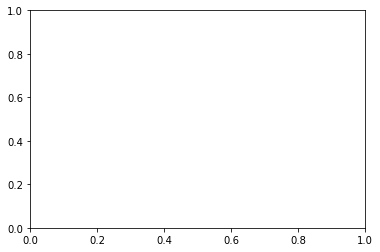

In [72]:
from fullwavepy.ioapi.generic import read_txt
import pandas as pd
fbreaks = read_txt('../data/data_s01-Synthetic_firstbreaks.txt')
fbreaks = [float(i[0]) for i in fbreaks]
dt = .0025
df = pd.read_csv('../data/data_s01-Synthetic_HEAD.csv')
df['fb'] = [int(i) * dt for i in fbreaks]

NameError: name 'sgyobs' is not defined

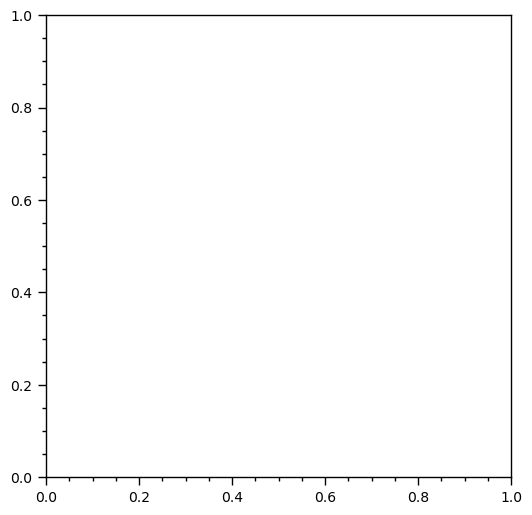

In [4]:
%%time 
kw_mute = dict(ntaper=100, twin=1)
path = '../data/'
from fullwavepy.seismic.data import DataMuterSUSGY, DataFileSgy
from fwipy.ioapi.su import sushw
tstat = sgyobs.read_header(overwrite=1).tstat.unique()
assert len(tstat) == 1
# tstat[0]
syn = Dat(dt=.0025, file=DataFileSgy(sgylvz.name, path))
sushw(syn.file.fname, 'tstat', tstat)
DataMuterSUSGY().mute(sgylvz.fname, tmute=df['fb'], **kw_mute)

# Plot

## 125, 30

In [ ]:
tracf, ep = 4125, 30

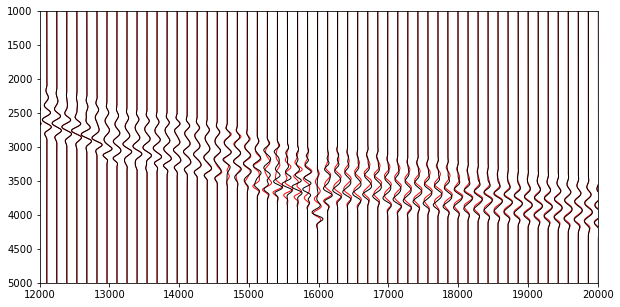

In [87]:
fig = plt.figure(figsize=(10,5))
kws = dict(label='obs', color='r', ow=0, norm='rms', amplify=10)
ax = plot_data_wigg(sgy000m, tracf, ep, **kws)
ax = plot_data_wigg(sgylvzm, tracf, ep, **dict(kws, color='k'))

plt.xlim(12000, 20000)
plt.ylim(1000,5000)
ax.invert_yaxis()

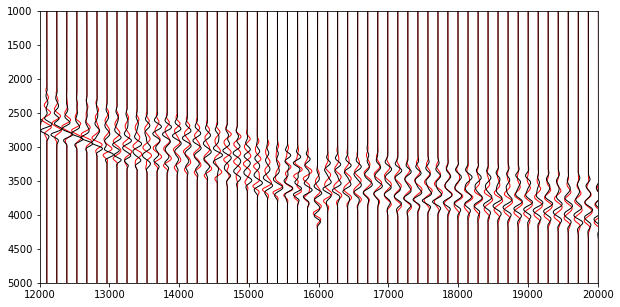

In [89]:
fig = plt.figure(figsize=(10,5))

kws = dict(label='obs', color='r', ow=0, norm='rms', amplify=10)
ax = plot_data_wigg(sgy000m, tracf, ep, **kws)
ax = plot_data_wigg(sgyobsm, tracf, ep, **dict(kws, color='k'))

plt.xlim(12000, 20000)
plt.ylim(1000,5000)
ax.invert_yaxis()

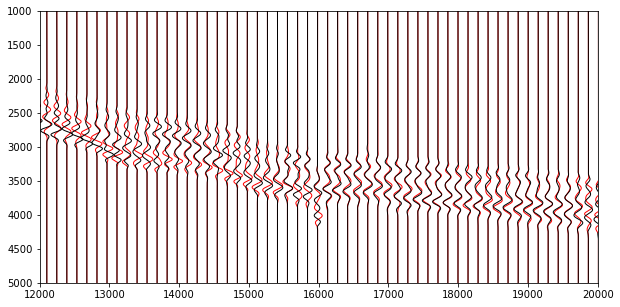

In [90]:
fig = plt.figure(figsize=(10,5))
kws = dict(label='obs', color='r', ow=0, norm='rms', amplify=10)
ax = plot_data_wigg(sgy160m, tracf, ep, **kws)
ax = plot_data_wigg(sgyobsm, tracf, ep, **dict(kws, color='k'))

plt.xlim(12000, 20000)
plt.ylim(1000,5000)
ax.invert_yaxis()

## 112, 30 (good!)

In [91]:
tracf, ep = 4112, 30

INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


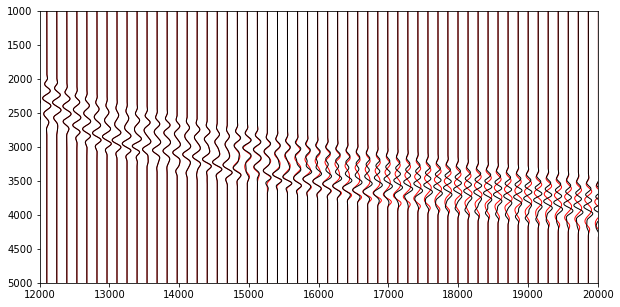

In [92]:
fig = plt.figure(figsize=(10,5))
kws = dict(label='obs', color='r', ow=0, norm='rms', amplify=10)
ax = plot_data_wigg(sgy000m, tracf, ep, **kws)
ax = plot_data_wigg(sgylvzm, tracf, ep, **dict(kws, color='k'))

plt.xlim(12000, 20000)
plt.ylim(1000,5000)
ax.invert_yaxis()

INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


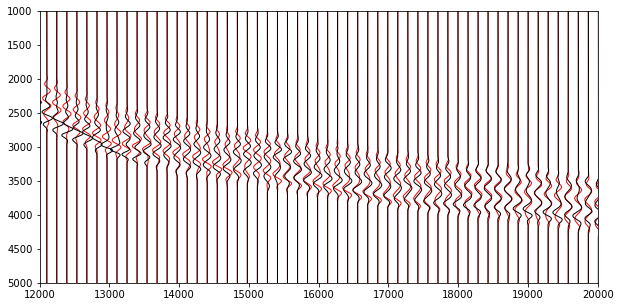

In [93]:
fig = plt.figure(figsize=(10,5))

kws = dict(label='obs', color='r', ow=0, norm='rms', amplify=10)
ax = plot_data_wigg(sgy000m, tracf, ep, **kws)
ax = plot_data_wigg(sgyobsm, tracf, ep, **dict(kws, color='k'))

plt.xlim(12000, 20000)
plt.ylim(1000,5000)
ax.invert_yaxis()

INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


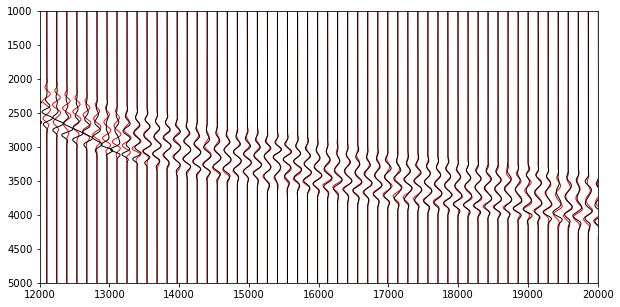

In [94]:
fig = plt.figure(figsize=(10,5))
kws = dict(label='obs', color='r', ow=0, norm='rms', amplify=10)
ax = plot_data_wigg(sgy160m, tracf, ep, **kws)
ax = plot_data_wigg(sgyobsm, tracf, ep, **dict(kws, color='k'))

plt.xlim(12000, 20000)
plt.ylim(1000,5000)
ax.invert_yaxis()

## 112, 30 (good!) 
Polishing insets

In [95]:
tracf, ep = 4112, 30

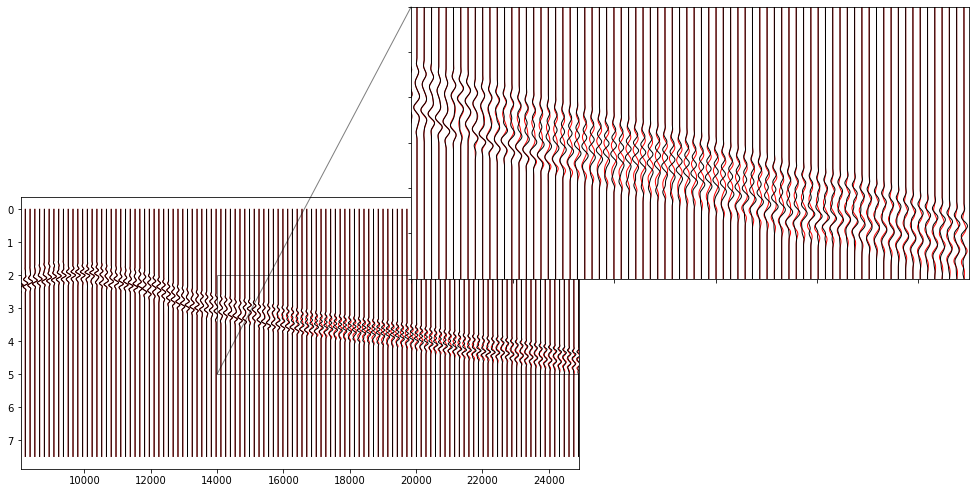

In [133]:
fig, ax = plt.subplots(figsize=(10,5))
kws = dict(label='obs', color='r', ow=0, norm='rms', amplify=10, ax=ax)
ax = plot_data_wigg(sgy000m, tracf, ep, **kws)
ax = plot_data_wigg(sgylvzm, tracf, ep, **dict(kws, color='k'))

# plt.xlim(12000, 20000)
# plt.ylim(1000,5000)
ax.invert_yaxis()
axins = ax.inset_axes([.7, .7, 1, 1])
plot_data_wigg(sgy000m, tracf, ep, **dict(kws, ax=axins))
plot_data_wigg(sgylvzm, tracf, ep, **dict(kws, ax=axins, color='k'))
# sub region of the original image
x1, x2, y1, y2 = 14e3, 25e3, 2, 5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.invert_yaxis()
_ = ax.indicate_inset_zoom(axins, edgecolor="black")

INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


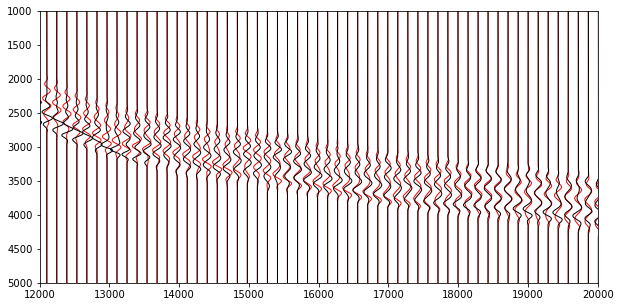

In [93]:
fig = plt.figure(figsize=(10,5))

kws = dict(label='obs', color='r', ow=0, norm='rms', amplify=10)
ax = plot_data_wigg(sgy000m, tracf, ep, **kws)
ax = plot_data_wigg(sgyobsm, tracf, ep, **dict(kws, color='k'))

plt.xlim(12000, 20000)
plt.ylim(1000,5000)
ax.invert_yaxis()

INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


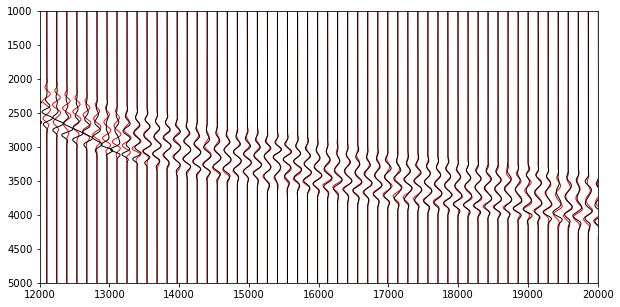

In [94]:
fig = plt.figure(figsize=(10,5))
kws = dict(label='obs', color='r', ow=0, norm='rms', amplify=10)
ax = plot_data_wigg(sgy160m, tracf, ep, **kws)
ax = plot_data_wigg(sgyobsm, tracf, ep, **dict(kws, color='k'))

plt.xlim(12000, 20000)
plt.ylim(1000,5000)
ax.invert_yaxis()

## 112, 30 (good!) 

In [311]:
tracf, ep = 4112, 30

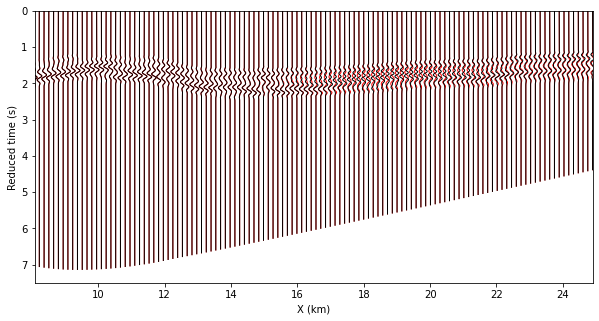

In [140]:
fig, ax = plt.subplots(figsize=(10,5))
kws = dict(label='obs', color='r', ow=0, norm='rms', amplify=10, ax=ax, vel_red=5000)
ax = plot_data_wigg(sgy000m, tracf, ep, **kws)
ax = plot_data_wigg(sgylvzm, tracf, ep, **dict(kws, color='k'))
ax.invert_yaxis()

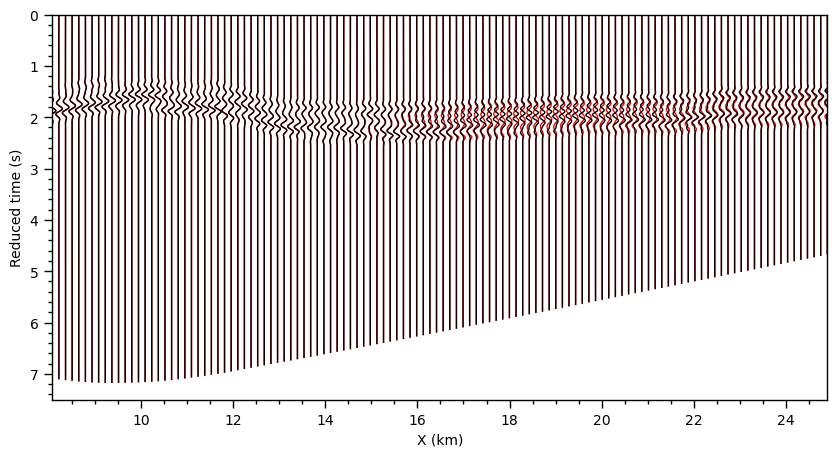

In [156]:
fig, ax = plt.subplots(figsize=(10,5))
kws = dict(label='obs', color='r', ow=0, norm='rms', amplify=10, ax=ax, vel_red=5500)
ax = plot_data_wigg(sgy000m, tracf, ep, **kws)
ax = plot_data_wigg(sgylvzm, tracf, ep, **dict(kws, color='k'))
ax.invert_yaxis()

## Plotting model

In [300]:
from fwipy.utils import *

In [255]:
# read bathymetry and final model 
from arrau.a2d import Arr2d
xp = PROTEUS()
xp.read_all()
b01 = Box3d(8,25, -3,15, 0,4)
bt = Arr2d(xp.read_bathy_topo().extract(np.array(b01.xy)*1e3).arr/1e3, extent=b01.xy)
from fwipy.ndat.arrays import Arr3d
vp = Arr3d(source='../data/p14-CP00160-Vp.mmp', shape=(341,361,81), extent=b01.extent)
from arrau.a3d import Arr3d
vp = Arr3d(vp / 1000, extent=b01.extent)
sl = vp.slice(value=2.55, axis=2, unit='km')

Text(0, 0.5, 'Y (km)')

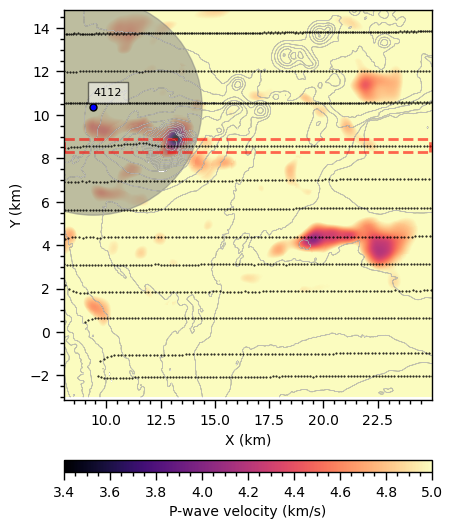

In [312]:
sl.plot(mode='im', cmap='magma', vmin=3.4, vmax=5,
        colors='Grey', linestyles='solid', levels=np.arange(3.5,5.6,0.5),
        show_cntr_labels=True, fontsize=8, fmt='%1.1f',
        orientation='horizontal', position='bottom', pad=.6, label='P-wave velocity (km/s)')
bt.plot(mode='contour', aspect='equal', colors='k')  

srcs_x, srcs_y, recs_x, recs_y = read_geom(sgy000, tracf, divide_by=1000)
x1, x2, y1, y2 = read_geom_bounds(sgyobs, divide_by=1000, pady=1000)
shotcolor='k'
bt.plot(mode='contour', aspect='equal', colors='w')   
plt.plot(srcs_x, srcs_y, linestyle='', marker='.', label='shot',
             markersize=1, markerfacecolor=shotcolor, markeredgecolor=shotcolor)
plt.plot(recs_x, recs_y, marker='o', linestyle='', markersize=5, 
                   markeredgecolor='k', markeredgewidth=1, markerfacecolor='b')
for x, y in zip(recs_x, recs_y):
    plt.gca().annotate(text=str(tracf), xy=(x,y), xytext=(x, y+0.5), clip_on=True, fontsize=8,
                        bbox={'facecolor': 'w', 'edgecolor': 'k', 'alpha': .5})   
circ = plt.Circle((recs_x[0],recs_y[0]), 5, color='Grey', alpha=.5)
plt.gca().add_patch(circ)
plot_box_around_line(sgy000, tracf, ep, divide_by=1000, padx=0, pady=200)
plt.xlim(x1, x2)
plt.ylim(y1, y2)
plt.xlabel('X (km)')
plt.ylabel('Y (km)')

## Plotting geometry

(-2.326, 14.047)

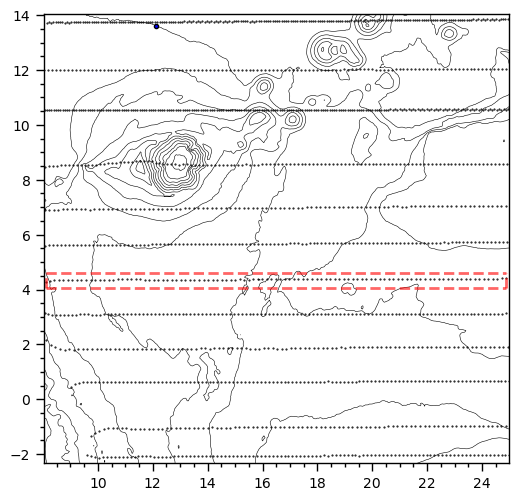

In [309]:
srcs_x, srcs_y, recs_x, recs_y = read_geom(sgy000, tracf, divide_by=1000)
x1, x2, y1, y2 = read_geom_bounds(sgyobs, divide_by=1000, pady=200)
shotcolor='k'
bt.plot(mode='contour', aspect='equal', colors='k')   
plt.plot(srcs_x, srcs_y, linestyle='', marker='.', label='shot',
             markersize=1, markerfacecolor=shotcolor, markeredgecolor=shotcolor)
plt.plot(recs_x, recs_y, marker='o', linestyle='', markersize=3, 
                   markeredgecolor='k', markeredgewidth=1, markerfacecolor='b') 
plot_box_around_line(sgy000, tracf, ep, divide_by=1000, padx=0, pady=200)
plt.xlim(x1, x2)
plt.ylim(y1, y2)

## Combining all plots

In [6]:
# read bathymetry and final model 
from arrau.a2d import Arr2d
xp = PROTEUS()
xp.read_all()
b01 = Box3d(8,25, -3,15, 0,4)
bt = Arr2d(xp.read_bathy_topo().extract(np.array(b01.xy)*1e3).arr/1e3, extent=b01.xy)
from fwipy.ndat.arrays import Arr3d
vp = Arr3d(source='../data/p14-CP00160-Vp.mmp', shape=(341,361,81), extent=b01.extent)
from arrau.a3d import Arr3d
vp = Arr3d(vp / 1000, extent=b01.extent)
sl = vp.slice(value=2.55, axis=2, unit='km')

INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


In [11]:
from fwipy.utils import *
sgydict = {'obsm': {'name': 'field', 'file': sgyobsm},
           'lvzm': {'name': 'synth_start_LVZ', 'file': sgylvzm},
           '000m': {'name': 'synth_start', 'file': sgy000m},
           '160m': {'name': 'synth_final', 'file': sgy160m},
          }
def plot_model_etc(sgyfile, tracf, ep, cmap='magma'):
    sl.plot(mode='im', cmap=cmap, vmin=3.4, vmax=5,
            colors='Grey', linestyles='solid', levels=np.arange(3.5,5.6,0.5),
            show_cntr_labels=True, fontsize=8, fmt='%1.1f',
            orientation='horizontal', position='bottom', pad=.6, label='P-wave velocity (km/s)')
    bt.plot(mode='contour', aspect='equal', colors='k')  

    srcs_x, srcs_y, recs_x, recs_y = read_geom(sgyfile, tracf, divide_by=1000)
    x1, x2, y1, y2 = read_geom_bounds(sgyfile, divide_by=1000, pady=1000)
    shotcolor='k'
    bt.plot(mode='contour', aspect='equal', colors='w')   
    plt.plot(srcs_x, srcs_y, linestyle='', marker='.', label='shot',
                 markersize=1, markerfacecolor=shotcolor, markeredgecolor=shotcolor)
    plt.plot(recs_x, recs_y, marker='o', linestyle='', markersize=5, 
                       markeredgecolor='k', markeredgewidth=1, markerfacecolor='b')
    for x, y in zip(recs_x, recs_y):
        plt.gca().annotate(text=str(tracf), xy=(x,y), xytext=(x, y+0.5), clip_on=True, fontsize=8,
                            bbox={'facecolor': 'w', 'edgecolor': 'k', 'alpha': .5})   
    circ = plt.Circle((recs_x[0],recs_y[0]), 5, color='Grey', alpha=.5)
    plt.gca().add_patch(circ)
    plot_box_around_line(sgyfile, tracf, ep, divide_by=1000, padx=0, pady=200)
    plt.xlim(x1, x2)
    plt.ylim(y1, y2)
    plt.xlabel('X (km)')
    plt.ylabel('Y (km)')
def plot_all(sgydict, sgyid1, sgyid2, tracf, ep, save):
    from matplotlib.gridspec import GridSpec
    label1 = sgydict[sgyid1]['name']
    label2 = sgydict[sgyid2]['name']
    fig = plt.figure(figsize=(10,16))
    gs = GridSpec(2, 1, height_ratios=[1,4])
    # data
    ax1 = fig.add_subplot(gs[0,0])
    kws = dict(ow=0, norm='rms', amplify=10, ax=ax1, vel_red=5000,
               tmin=1, tmax=3)
    ax1 = plot_data_wigg(sgydict[sgyid1]['file'], tracf, ep, label=label1, color='r', **kws)
    ax1 = plot_data_wigg(sgydict[sgyid2]['file'], tracf, ep, label=label2, color='k', **kws)
    ax1.invert_yaxis()
    plt.legend(loc='lower left')
    # model etc. 
    ax2 = fig.add_subplot(gs[1,0])
    plot_model_etc(sgydict[sgyid1]['file'], tracf=tracf, ep=ep, cmap='magma')
    plt.tight_layout()
    if save:
        add = ''
        plt.savefig('figures/fit/fit_%sOBS%s_line%s_%s_VS_%s.png' % (add, tracf, 
                                                                  str(ep).rjust(3, '0'), 
                                                                  label1, 
                                                                  label2),
                    dpi=300)
        plt.close()    

In [397]:
# %%time 
# pairs = [['lvzm', '000m'], ['obsm', '000m'], ['obsm', '160m']]
# obs_above = [4104, 4105, 4109, 4110, 4112]
# lines_below = [30, 7, 27, 8, 26, 9]
# obs_below = [4125, 4124, 4123, 4139, 4138, 4137]
# lines_above = [38, 5, 31, 37, 6, 30]
# for tracf in obs_above:
#     for ep in lines_below:
#         for pair in pairs:
#             plot_all(sgydict, *pair, tracf, ep, save=1)

CPU times: user 8min 23s, sys: 53.9 s, total: 9min 17s
Wall time: 17min 59s


In [12]:
%%time 
pairs = [['lvzm', '000m'], ['obsm', '000m'], ['obsm', '160m']]
obs_above = [4104, 4105, 4109, 4110, 4112]
lines_below = [30, 7, 27, 8, 26, 9]
obs_below = [4125, 4124, 4123, 4139, 4138, 4137]
lines_above = [38, 5, 31, 37, 6, 30]
for tracf in obs_below:
    for ep in lines_above:
        for pair in pairs:
            plot_all(sgydict, *pair, tracf, ep, save=1)

INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fwipy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
CPU times: user 10min 4s, sys: 36.6 s, total: 10min 40s
Wall time: 16min 21s


# ...